Importing Dependencies

In [24]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import(
    StratifiedKFold,
    cross_validate
)

from sklearn.metrics import(
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score
)

warnings.filterwarnings("ignore")

Load The Dataset

In [25]:
X_train = np.load('../artifacts/X_train.npz')['arr_0']
Y_train = np.load('../artifacts/Y_train.npz')['arr_0']
X_test = np.load('../artifacts/X_test.npz')['arr_0']
Y_test = np.load('../artifacts/Y_test.npz')['arr_0']

Configure k-Fold CV

In [26]:
cv = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=42
)

In [27]:
lr = LogisticRegression(
    max_iter=1000, random_state=42
)

In [28]:
score_arr = ['accuracy', 'precision', 'recall', 'f1']

cv_results = cross_validate(
    lr,
    X_train,
    Y_train,
    cv = cv, 
    scoring = 'f1', # metrics to evaluate
    return_train_score = True  
)   
    
test_score = cv_results['test_score']
test_score_mean = np.mean(test_score)
print(f"f1 : {test_score_mean}")
 

f1 : 0.7165510168838646


In [29]:
test_f1_score = np.argmax(cv_results['test_score'])
test_f1_score 

np.int64(3)

In [30]:
best_index = np.argmax(cv_results['test_score'])
fold_indices = list(cv.split(X_train, Y_train))

best_train_idx, best_test_idx = fold_indices[best_index]

X_train_best = X_train[best_train_idx]
Y_train_best = Y_train[best_train_idx]
X_test_best = X_train[best_test_idx]
Y_test_best = Y_train[best_test_idx]

In [31]:
lr = LogisticRegression(
    max_iter=1000, random_state=42
)

lr.fit(X_train_best, Y_train_best)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [34]:
Y_hat_train = lr.predict(X_train)
Y_hat_test = lr.predict(X_test)

In [35]:
acc = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1 = f1_score(Y_test, Y_hat_test)

In [36]:
print(f"Accuracy: {acc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7235
Precision: 0.3795180722891566
Recall: 0.6412213740458015
F1 Score: 0.4768211920529801


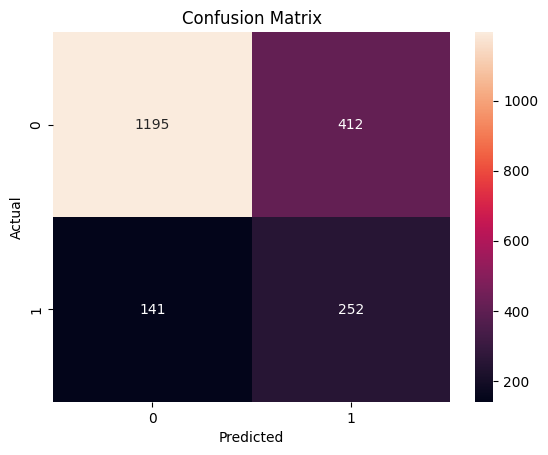

In [38]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()